# Production data EDA 

## Importing packages 

In [125]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

# Loading the data

Since the data is already cleaned in a previous notebook we can just load the cleaned dataset and dicve in to the analyses. 

In [126]:
df= pd.read_csv('../data/ProductionData/cleaned_energie_opwek.csv')
df


,datetime,point,type,granularity,timezone,activity,classification,capacity,volume,percentage,emission,emissionfactor
0,2020-12-31 23:00:00,Nederland,WastePower,Hour,UTC,Providing,Current,418750,418750,0.536859,125625,0.3
1,2021-01-01 00:00:00,Nederland,WastePower,Hour,UTC,Providing,Current,416000,416000,0.533333,124800,0.3
2,2021-01-01 01:00:00,Nederland,WastePower,Hour,UTC,Providing,Current,430250,430250,0.551602,129075,0.3
3,2021-01-01 02:00:00,Nederland,WastePower,Hour,UTC,Providing,Current,436750,436750,0.559936,131025,0.3
4,2021-01-01 03:00:00,Nederland,WastePower,Hour,UTC,Providing,Current,436000,436000,0.558974,130800,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...
271579,2023-12-31 18:00:00,Nederland,WindOffshoreC,Hour,UTC,Providing,Current,3144000,3144000,1.431400,0,0.0
271580,2023-12-31 19:00:00,Nederland,WindOffshoreC,Hour,UTC,Providing,Current,3102250,3102250,1.412392,0,0.0
271581,2023-12-31 20:00:00,Nederland,WindOffshoreC,Hour,UTC,Providing,Current,3086249,3086249,1.405107,0,0.0
271582,2023-12-31 21:00:00,Nederland,WindOffshoreC,Hour,UTC,Providing,Current,3051749,3051749,1.389403,0,0.0


## Data analysis

### General distribution

First we will be looking at the general distribution of the data. We started it of with looking at how much data we have for each energy source. 

<Axes: xlabel='type'>

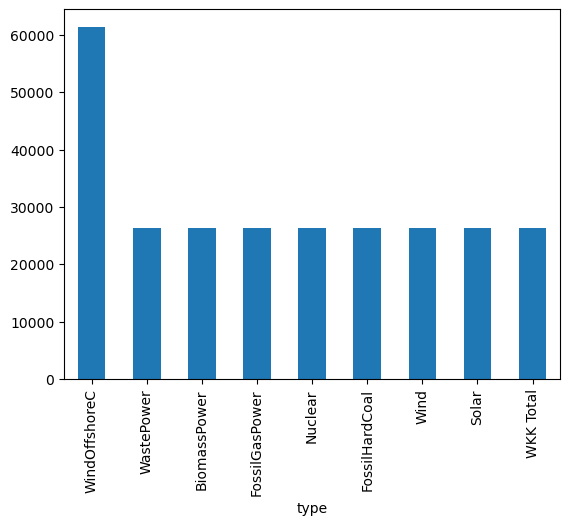

In [127]:
df['type'].value_counts().plot(kind='bar')

as vissible in the above graph there are 9 types of energy sources. of which the wind of shore occours the most in the dataset. it occurs 2 times more then each other sources. the rest are occur the same amount of times in the dataset. 

There is a type in it that is hard to understand because it is the only abreviated name. so we will be changing that to the actual name. 

In [128]:
df['type'] = df['type'].replace('WKK Total', 'WarmteKrachtKoppeling')

next we will be looking at the capacity each source brings. to see if certain sources produce more per ocurance then others. 

Text(0, 0.5, 'Total Capacity')

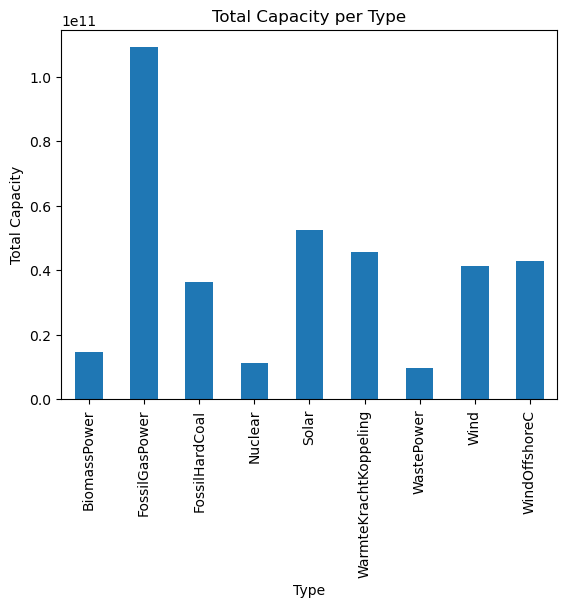

In [129]:
df.groupby('type')['capacity'].sum().plot(kind='bar')
plt.title('Total Capacity per Type')
plt.xlabel('Type')
plt.ylabel('Total Capacity')

here you can see that wind of shore occure more in tha data but does not produce a lot per occurance since the regular wind who occured about half as much as the wind of shore. besids that you can see that fossil gas produces a lot of energy i compared to the rest. and bio mass, nuclear and waste power very little. 

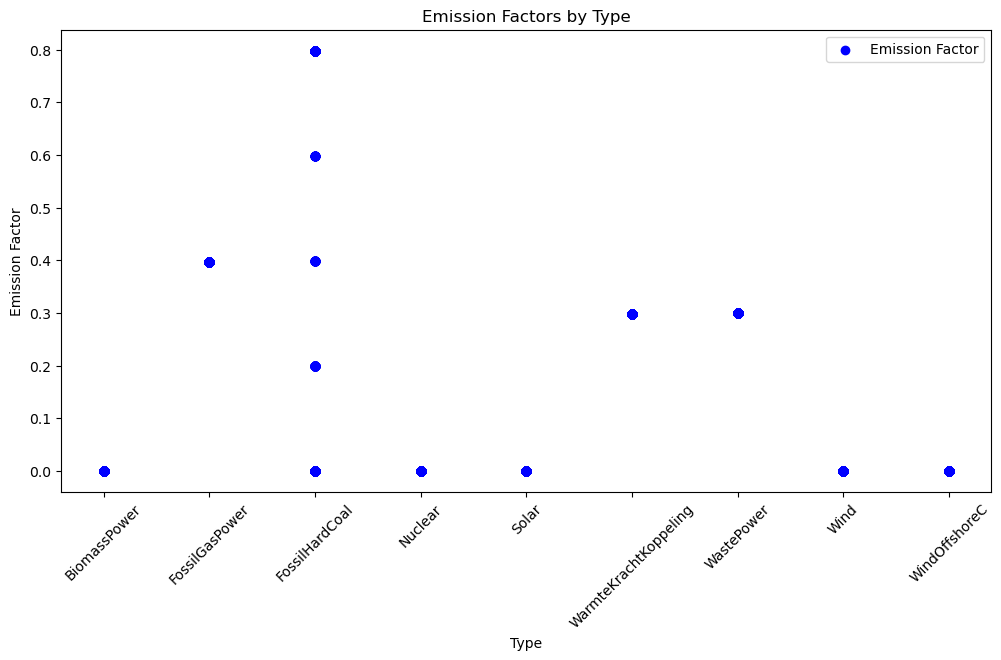

In [130]:
df = df.sort_values(by='type')

# Set figure size before plotting
plt.figure(figsize=(12, 6))

# Plot the line graph
plt.scatter(df['type'], df['emissionfactor'], color='b', label='Emission Factor')

# Add labels and title
plt.title('Emission Factors by Type')
plt.xlabel('Type')
plt.ylabel('Emission Factor')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Show the plot
plt.show()

There are emmision factors values in the fossilhardcoal type. this spikes intrest regarding to what the possible cause of this could be. so we will be further inspecting this in the next section. 

### Fosill hard coal

first we will be looking at the different this type contains. 

In [131]:
# Filter the dataframe for FossilGasPower
fossil_gas_df = df[df['type'] == 'FossilHardCoal']

# Display the unique emission factors for FossilGasPower
unique_emission_factors = fossil_gas_df['emissionfactor'].unique()
print("Unique emission factors for FossilGasPower:", unique_emission_factors)

Unique emission factors for FossilGasPower: [0.79799998 0.         0.59850001 0.19949999 0.39899999]


ity appear to just be five different vallues. next we will be lookig if it has a correlation with one of the other columns. 

C:\Users\Marjolein\AppData\Local\Temp\ipykernel_7824\312434198.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fossil_gas_df['datetime'] = pd.to_datetime(fossil_gas_df['datetime'])


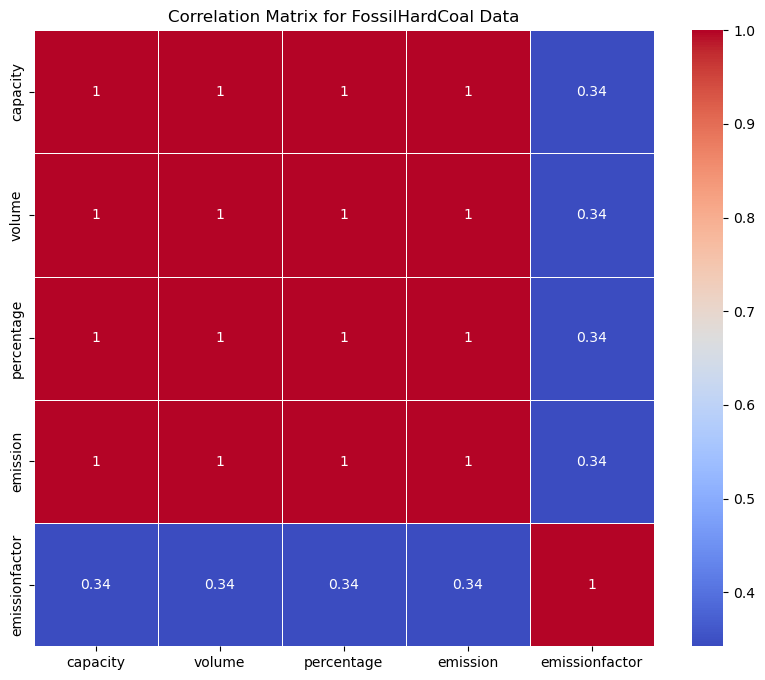

In [132]:
import seaborn as sns

# Filter the dataframe for FossilHardCoal
fossil_gas_df = df[df['type'] == 'FossilHardCoal']

# Ensure the datetime column is converted to datetime and set as index
fossil_gas_df['datetime'] = pd.to_datetime(fossil_gas_df['datetime'])
fossil_gas_df.set_index('datetime', inplace=True)

# Drop non-numeric columns before calculating the correlation matrix
numeric_fossil_gas_df = fossil_gas_df.drop(columns=['point', 'type', 'granularity', 'timezone', 'activity', 'classification'])

# Check for correlation between emission factors and other columns
correlation_matrix = numeric_fossil_gas_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for FossilHardCoal Data')
plt.show()

it doenst really seem to be caused by any of the rother numeric columns, so we will be looking for a trend within the date. to see wheather the temperature could effect the emoision factor. 

C:\Users\Marjolein\AppData\Local\Temp\ipykernel_7824\1852447464.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_emission = fossil_gas_df['emission'].resample('M').sum()
C:\Users\Marjolein\AppData\Local\Temp\ipykernel_7824\1852447464.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_emission = fossil_gas_df['emission'].resample('Y').sum()


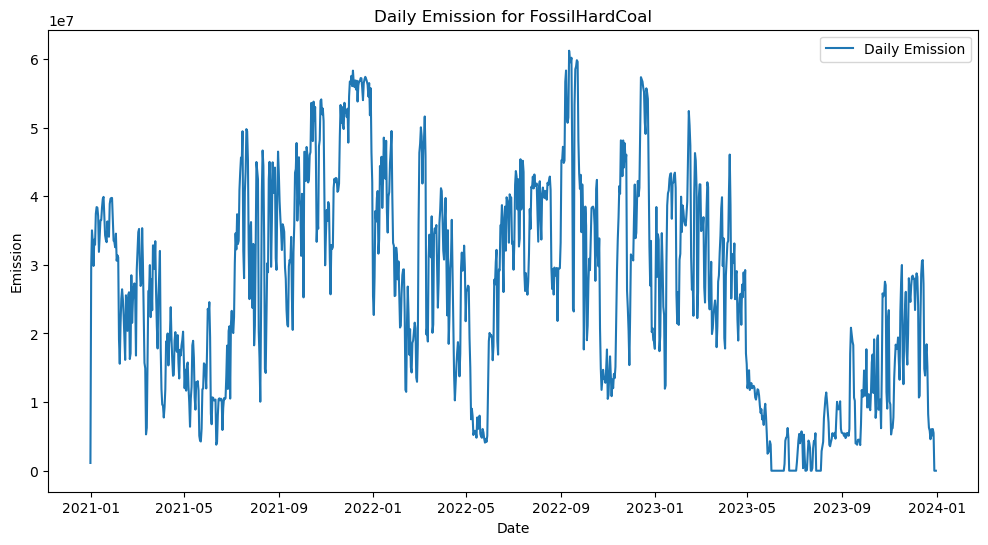

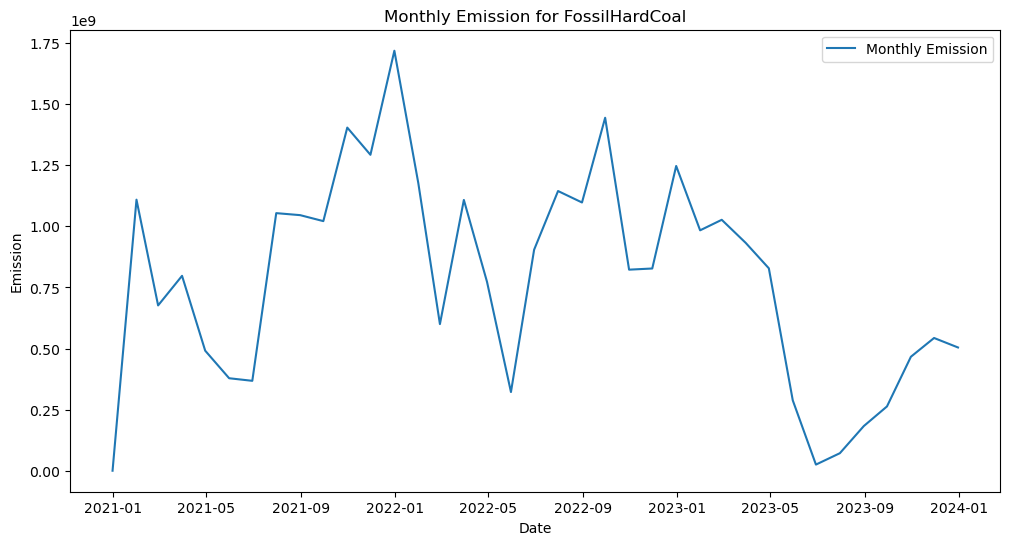

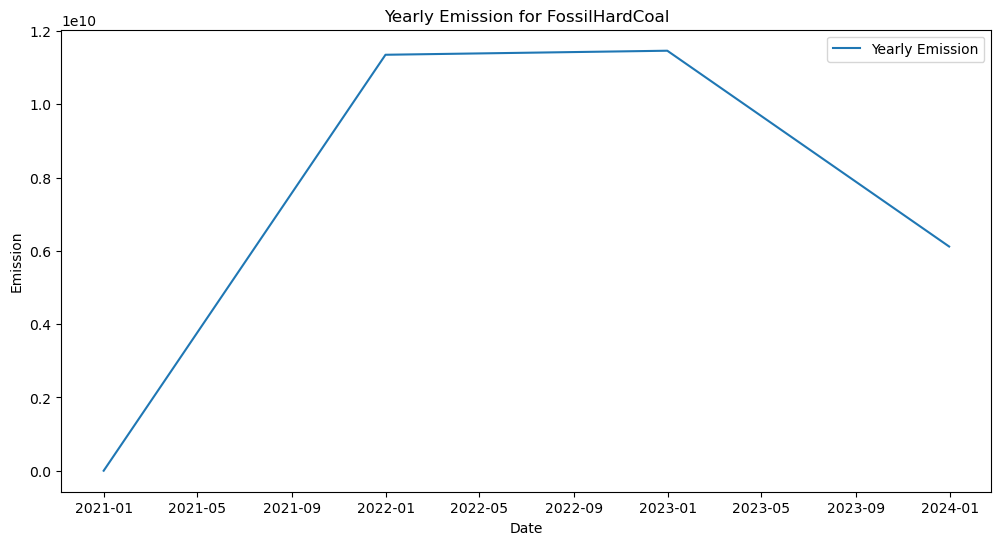

In [133]:
# Resample the data to daily, monthly, and yearly frequencies and calculate the sum of emissions
daily_emission = fossil_gas_df['emission'].resample('D').sum()
monthly_emission = fossil_gas_df['emission'].resample('M').sum()
yearly_emission = fossil_gas_df['emission'].resample('Y').sum()

# Plot the daily emission
plt.figure(figsize=(12, 6))
plt.plot(daily_emission, label='Daily Emission')
plt.title('Daily Emission for FossilHardCoal')
plt.xlabel('Date')
plt.ylabel('Emission')
plt.legend()
plt.show()

# Plot the monthly emission
plt.figure(figsize=(12, 6))
plt.plot(monthly_emission, label='Monthly Emission')
plt.title('Monthly Emission for FossilHardCoal')
plt.xlabel('Date')
plt.ylabel('Emission')
plt.legend()
plt.show()

# Plot the yearly emission
plt.figure(figsize=(12, 6))
plt.plot(yearly_emission, label='Yearly Emission')
plt.title('Yearly Emission for FossilHardCoal')
plt.xlabel('Date')
plt.ylabel('Emission')
plt.legend()
plt.show()

In the monthely you can see there does appear to be a trend where around june the emision factor is lower and in spetember i rises again. 